In [105]:
from preamble import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
import sklearn
%matplotlib inline
# 한글출력 : 한글 출력 시 오류 나면 추가
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

In [106]:
# Cancer data
# 깊이 3인 트리 100개
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [107]:
# 과대적합 피하기
# 트리의 최대깊이를 줄여 사전 가지치기
# 학습률 낮추기
from sklearn.model_selection import cross_val_score # cross_val_score import
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100,noise=0.25,random_state=3)

cvscores = cross_val_score(gbrt,X,y,cv=10)
print("테스트 세트 정확도 CV = 10: {:.3f}\n".format(cvscores.mean()))

cvscores = cross_val_score(gbrt,X,y,cv=5)
print("테스트 세트 정확도 CV = 5: {:.3f}\n".format(cvscores.mean()))

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)

테스트 세트 정확도 CV = 10: 0.890

테스트 세트 정확도 CV = 5: 0.850



In [108]:
# 파라미터 조정
# max_depth = 1
# 트리 최대 깊이는 낮춤
# 과적합을 피하고 테스트 데이터 성능 향상
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test,y_test)))
cvscores = cross_val_score(gbrt,X,y,cv=10)
print("테스트 세트 정확도 CV = 10: {:.3f}".format(cvscores.mean()))
cvscores = cross_val_score(gbrt,X,y,cv=5)
print("테스트 세트 정확도 CV = 5: {:.3f}".format(cvscores.mean()))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972
테스트 세트 정확도 CV = 10: 0.890
테스트 세트 정확도 CV = 5: 0.870


In [109]:
# learning_rate = 0.01
# 학습률을 낮춤
gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test,y_test)))
cvscores = cross_val_score(gbrt,X,y,cv=10)
print("테스트 세트 정확도 CV = 10: {:.3f}".format(cvscores.mean()))
cvscores = cross_val_score(gbrt,X,y,cv=5)
print("테스트 세트 정확도 CV = 5: {:.3f}".format(cvscores.mean()))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965
테스트 세트 정확도 CV = 10: 0.870
테스트 세트 정확도 CV = 5: 0.860


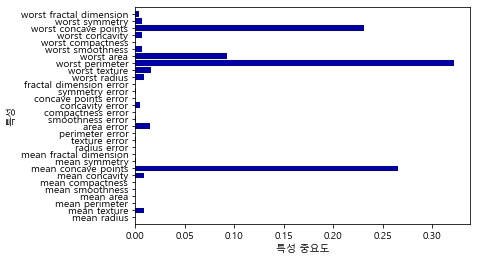

In [110]:
# GradientBoosting Vs. Random Forest
# GradientBoosting
# 일부 특성 무시
    
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

plot_feature_importances_cancer(gbrt)

# Random Forest는 4주차 실습 때 학습 학습

In [111]:
# 데이터 준비
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500,noise=0.30,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

# 보팅클래스 : 랜덤포레스트, 로지스틱회귀, 결정트리
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

log_clf = LogisticRegression(solver="lbfgs",random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100,random_state=42)
dt_clf = DecisionTreeClassifier(max_depth = 3, random_state=42)

# Hard
voting_clf = VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('dt',dt_clf)],voting='hard')
voting_clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, dt_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
DecisionTreeClassifier 0.896
VotingClassifier 0.904


In [112]:
# Soft
voting_clf = VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('dt',dt_clf)],voting='soft')
voting_clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, dt_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

# 똑같이 했음에도 예제와 달리 hard와 soft의 값이 동일함
# 예제의 경우 hard의 VotingClassifier = 0.928

LogisticRegression 0.864
RandomForestClassifier 0.896
DecisionTreeClassifier 0.896
VotingClassifier 0.904


In [113]:
# OOB(Out-Of-Bag) 평가
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,
bootstrap=True, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
#obb-score 출력
print("oob_score:",bag_clf.oob_score_)
#decisiontree bagging
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

oob_score: 0.8986666666666666


0.912

In [114]:
# XGBoost(Extreme Gradient Boosting)
# Gradient Boosting을 최적화
# 빠른 속도, 확장성, 이식성
#xgboost 인스톨
!pip install xgboost
#xgboost 임포트
import xgboost
xgb_clf = xgboost.XGBClassifier(n_estimators=100, max_depth=3,
random_state=42,
eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
accuracy_score(y_test, y_pred)
#make-moon데이터 분류 결과 : 0.872

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.872

Text(0, 0.5, '특성 1')

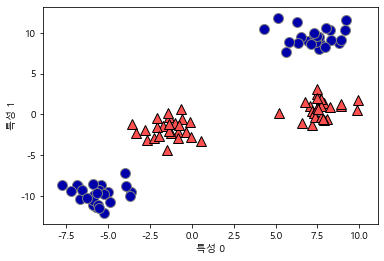

In [115]:
# 교재 참고하여 해당 부분 추가
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, '특성 1')

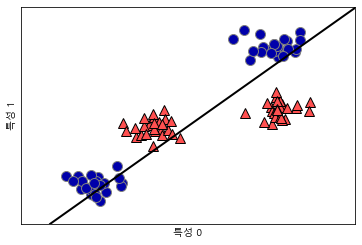

In [116]:
# LinearSVC
# 2차원 특성
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0.5, 0, '특성 1 ** 2')

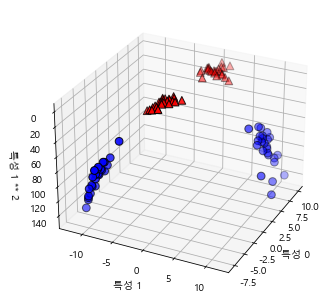

In [117]:
# 교재 참고
# 두 번재 특성을 제곱하여 추가한다
X_new = np.hstack([X, X[:, 1:]**2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure,elev=-152,azim=-26)
# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그린다
mask = y == 0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60,edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60,edgecolor='k')
ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성 1 ** 2")

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0.5, 0, '특성1 ** 2')

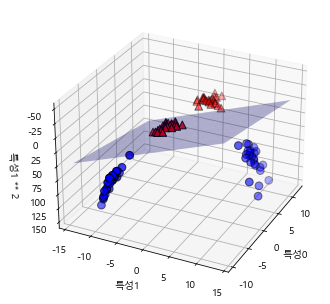

In [118]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0, 0.5, '특성 1')

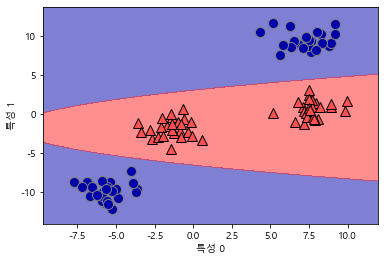

In [119]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()],cmap=mglearn.cm2,alpha=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# 선형보다 타원에 가까운 결정경계

Text(0, 0.5, '특성 1')

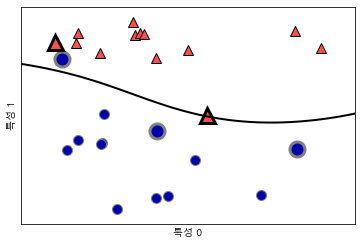

In [120]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# 서포트 벡터
sv = svm.support_vectors_
# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다.
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

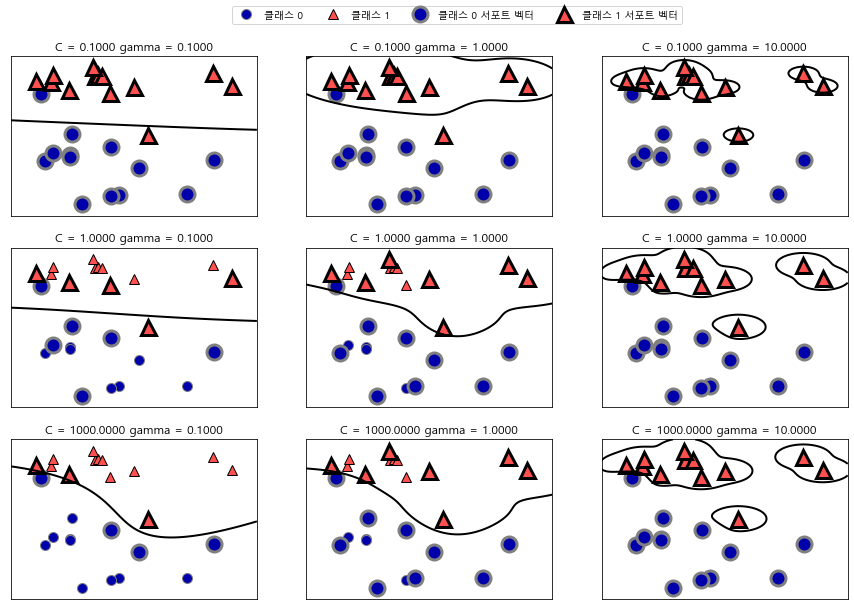

In [121]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트 벡터"],
                  ncol=4, loc=(.9, 1.2))

In [122]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

# 예졔 결과는 1.00 / 0.63 으로 해당 모델이 상당히 과대적합된 것을 보여주나
# 코드 실행결과 다르게 나옴

훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.94


In [126]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0, 최대값은 1입니다.
X_train_scaled = (X_train - min_on_training) / range_on_training

# 테스트 세트에도 같은 작업을 적용하지만
# 훈련 세트에서 계산한 최솟값과 범위를 사용합니다(자세한 내용은 3장에 있습니다).
X_test_scaled = (X_test - min_on_training) / range_on_training

# 전처리 후 SVC
svc = SVC()
svc.fit(X_train_scaled,y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled,y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled,y_test)))

# 예제 0.948 / 0.951

훈련 세트 정확도: 0.984
테스트 세트 정확도: 0.972


In [125]:
svc = SVC(C=1000)
svc.fit(X_train_scaled,y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled,y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled,y_test)))

# 예제 0.988 / 0.972

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.958


In [128]:
# 기계학습9 - 신경망
from sklearn.neural_network import MLPClassifier
# Cancer data : z-score 표준화
# 훈련 세트 각 특성의 평균 계산
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준 편차 계산
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준 편자 1 인 데이터로 변환됨
X_train_scaled = (X_train - mean_on_train) / std_on_train
# (훈련 데이터의 평균과 표준 편차를 이용해) 같은 변환을 테스트 세트에도 적용
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled,y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled,y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [134]:
mlp = MLPClassifier(max_iter=1000,random_state=0)
mlp.fit(X_train_scaled,y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled,y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [132]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled,y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled,y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


In [150]:
# 강의 자료에 있는 다중클래스의 예제의 경우
# 앞 부분이 생략되어 출력 오류 발생
# 교재와는 다른 내용 기재
# 해당 코드 주석 처리

#print("결정 함수의 결과 형태: {}".format(gbrt.decision_function(X_test).shape))
# plot the first few entries of the decision function

#print("결정 함수 결과:\n{}".format(gbrt.decision_function(X_test)[:6, :]))
# predict_proba 결과 중 앞부분 일부를 확인한다
#print("예측 확률:\n{}".format(gbrt.predict_proba(X_test)[:6]))
#print("예측:\n{}".format(gbrt.predict(X_test)))